In [ ]:
from keras.models import Sequential
from keras.layers import Input, Dense # layer 층을 쌓을 때 필요
import numpy as np

In [4]:
# 1. data set 확보
# 2. data 전처리
X_data = np.array([[0, 0],
                   [0, 1],
                   [1, 0],
                   [1, 1]])
y_data = np.array([[0],[1],[1],[0]])

In [5]:
# 3. 모델 구성
## layer층 x_data 2개 -> 10 -> 20 -> 10 -> 1
model = Sequential()
model.add(Input(shape=(2,))) # 입력층
model.add(Dense(units=10, 
                input_dim=2, 
                activation='relu'))
model.add(Dense(units=20, activation='relu'))
model.add(Dense(units=10, activation='relu'))
model.add(Dense(units=1, activation='sigmoid')) # 이진 분류에서의 출력층 활성화 함수 sigmode, 3개 이상이면 softmax (출력합이 1)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                30        
                                                                 
 dense_1 (Dense)             (None, 20)                220       
                                                                 
 dense_2 (Dense)             (None, 10)                210       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 471
Trainable params: 471
Non-trainable params: 0
_________________________________________________________________


In [7]:
# 4. 모델 학습과정 설정
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

In [9]:
# 5. 학습
hist = model.fit(X_data, y_data, epochs=300, verbose=2)

Epoch 1/300
1/1 - 1s - loss: 0.6937 - binary_accuracy: 0.7500 - 583ms/epoch - 583ms/step
Epoch 2/300
1/1 - 0s - loss: 0.6919 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 3/300
1/1 - 0s - loss: 0.6903 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 4/300
1/1 - 0s - loss: 0.6889 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 5/300
1/1 - 0s - loss: 0.6883 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 6/300
1/1 - 0s - loss: 0.6877 - binary_accuracy: 0.5000 - 3ms/epoch - 3ms/step
Epoch 7/300
1/1 - 0s - loss: 0.6870 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 8/300
1/1 - 0s - loss: 0.6863 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 9/300
1/1 - 0s - loss: 0.6857 - binary_accuracy: 0.5000 - 5ms/epoch - 5ms/step
Epoch 10/300
1/1 - 0s - loss: 0.6851 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 11/300
1/1 - 0s - loss: 0.6844 - binary_accuracy: 0.5000 - 4ms/epoch - 4ms/step
Epoch 12/300
1/1 - 0s - loss: 0.6837 - binary_accuracy: 0.5

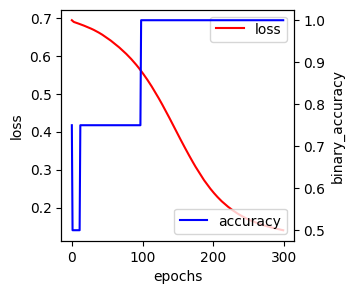

In [40]:
# 5. 학습과정 살펴보기
import matplotlib.pyplot as plt
fig, loss_ax = plt.subplots(figsize=(3,3))
loss_ax.plot(hist.history['loss'], 'r', label='loss')
loss_ax.set_xlabel('epochs')
loss_ax.set_ylabel('loss')
loss_ax.legend()
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='accuracy')
acc_ax.set_ylabel('binary_accuracy')
acc_ax.legend()

In [41]:
# 6. 학습평가하기
score = model.evaluate(X_data, y_data)
print('loss :', score[0])
print('binary accuracy', score[1])

1/1 [==============================] - 0s 349ms/step - loss: 0.1402 - binary_accuracy: 1.0000
loss : 0.140172079205513
binary accuracy 1.0


In [ ]:
# 7.모델 사용

model.predict(np.array([[0,1],[1,1]])).round()

1/1 [==============================] - 0s 22ms/step


array([[1.],
       [0.]], dtype=float32)